# Tim
- 2602099812 - Stephen Wijaya Utama
- 2602078146 - Daniel Ebenezer Budiharto

# Dataset
Dataset diambil dari rekap penjualan PT Tanjung Mulya bulan Juni, Juli, Agustus, dan Oktober. Dalam satu kertas rekap penjualan, terdapat tanggal penjualan dan kolom khusus yang berisi berapa saos lombok dan saos tomat yang terjual pada tanggal itu. 
Terdapat tanggal-tanggal di mana tidak terjadi transaksi karena hari libur dan alasan lainnya.

![image1](https://i.ibb.co.com/0KFZj0q/Whats-App-Image-2024-12-09-at-20-53-29-44f71e18.jpg)

Rekap diolah menjadi format digital dengan kolom tanggal, banyaknya saos lombok yang terjual, dan banyaknya saos tomat yang terjual.

![image2](https://i.ibb.co.com/x6XM18Z/Screenshot-2024-12-09-210005.png)

Pada akhirnya, terdapat 4 file berformat .csv yang akan diolah pada notebook ini.

![image3](https://i.ibb.co.com/T4Nq6t0/Screenshot-2024-12-09-210553.png)

# Preprocessing

In [1]:
import os 

for filename in os.listdir('.'):
    print(filename)

august.csv
bda_final_notebook.ipynb
july.csv
june.csv
october.csv


In [2]:
import pandas as pd

df1 = pd.read_csv('./june.csv')
df2 = pd.read_csv('./july.csv')
df3 = pd.read_csv('./august.csv')

combined_df = pd.concat([df1, df2, df3], ignore_index=True)

print(combined_df.head())

      tanggal  lombok_terjual  tomat_terjual
0  03-06-2024             288             80
1  04-06-2024             186             62
2  05-06-2024             224             38
3  06-06-2024             280            100
4  08-06-2024             362            146


In [3]:
df4 = pd.read_csv('./october.csv')

print(df4.head())

      tanggal  lombok_terjual  tomat_terjual
0  31-10-2024             357             87
1  30-10-2024              72             16
2  29-10-2024             137             50
3  26-10-2024             220             71
4  25-10-2024              72             17


In [4]:
combined_df['tanggal'] = pd.to_datetime(combined_df['tanggal'], format="%d-%m-%Y")
print(combined_df.head())

     tanggal  lombok_terjual  tomat_terjual
0 2024-06-03             288             80
1 2024-06-04             186             62
2 2024-06-05             224             38
3 2024-06-06             280            100
4 2024-06-08             362            146


In [5]:
df4['tanggal'] = pd.to_datetime(df4['tanggal'], format="%d-%m-%Y")
print(df4.head())

     tanggal  lombok_terjual  tomat_terjual
0 2024-10-31             357             87
1 2024-10-30              72             16
2 2024-10-29             137             50
3 2024-10-26             220             71
4 2024-10-25              72             17


In [6]:
combined_df['bulan'] = combined_df['tanggal'].dt.to_period('M')
sales_per_month1 = combined_df.groupby('bulan')[['lombok_terjual', 'tomat_terjual']].sum()
print(sales_per_month1)

         lombok_terjual  tomat_terjual
bulan                                 
2024-06            3409           1013
2024-07            5502           1565
2024-08            2549            734


In [7]:
df4['bulan'] = df4['tanggal'].dt.to_period('M')
sales_per_month2 = df4.groupby('bulan')[['lombok_terjual', 'tomat_terjual']].sum()
print(sales_per_month2)

         lombok_terjual  tomat_terjual
bulan                                 
2024-10            2198            593


In [8]:
print(combined_df.head())

     tanggal  lombok_terjual  tomat_terjual    bulan
0 2024-06-03             288             80  2024-06
1 2024-06-04             186             62  2024-06
2 2024-06-05             224             38  2024-06
3 2024-06-06             280            100  2024-06
4 2024-06-08             362            146  2024-06


In [9]:
print(df4.head())

     tanggal  lombok_terjual  tomat_terjual    bulan
0 2024-10-31             357             87  2024-10
1 2024-10-30              72             16  2024-10
2 2024-10-29             137             50  2024-10
3 2024-10-26             220             71  2024-10
4 2024-10-25              72             17  2024-10


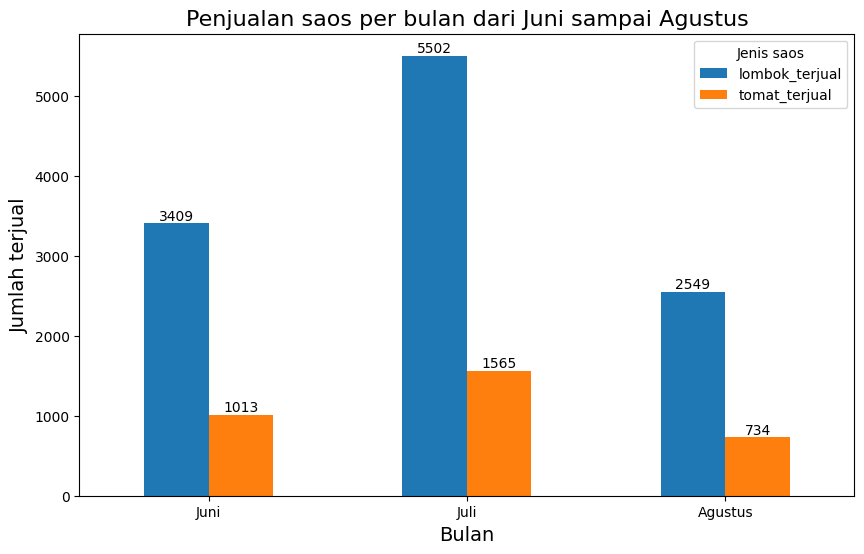

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 

ax = sales_per_month1.plot(kind='bar', figsize=(10, 6), legend=True)

plt.title('Penjualan saos per bulan dari Juni sampai Agustus', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah terjual', fontsize=14)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.xticks(ticks=range(len(sales_per_month1)), labels=['Juni', 'Juli', 'Agustus'], rotation=0)


plt.legend(title='Jenis saos')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()

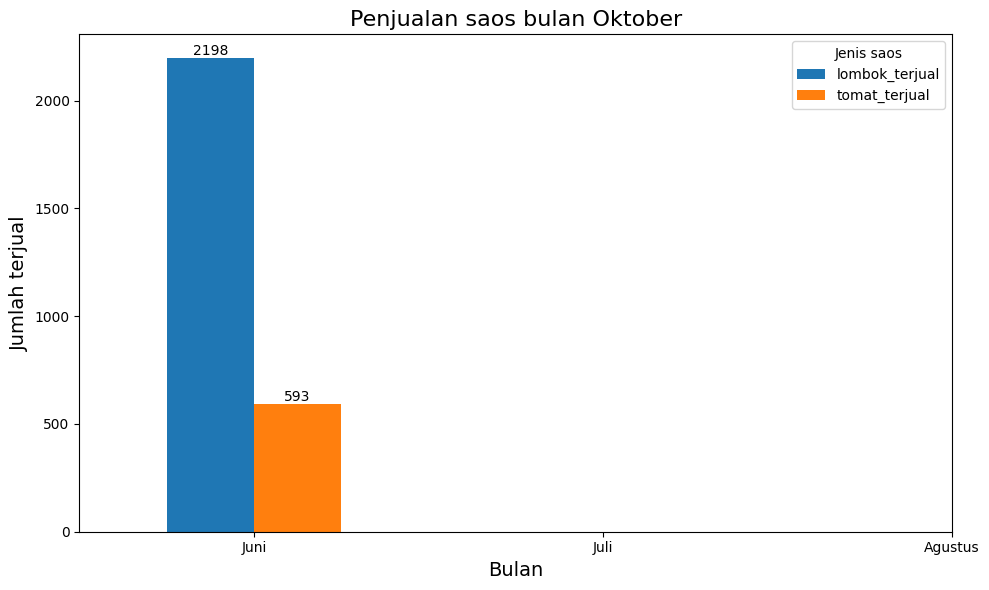

In [11]:
ax2 = sales_per_month2.plot(kind='bar', figsize=(10, 6), legend=True)

plt.title('Penjualan saos bulan Oktober', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah terjual', fontsize=14)

for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', fontsize=10)

plt.xticks(ticks=range(len(sales_per_month1)), labels=['Juni', 'Juli', 'Agustus'], rotation=0)


plt.legend(title='Jenis saos')
plt.tight_layout()
plt.show()

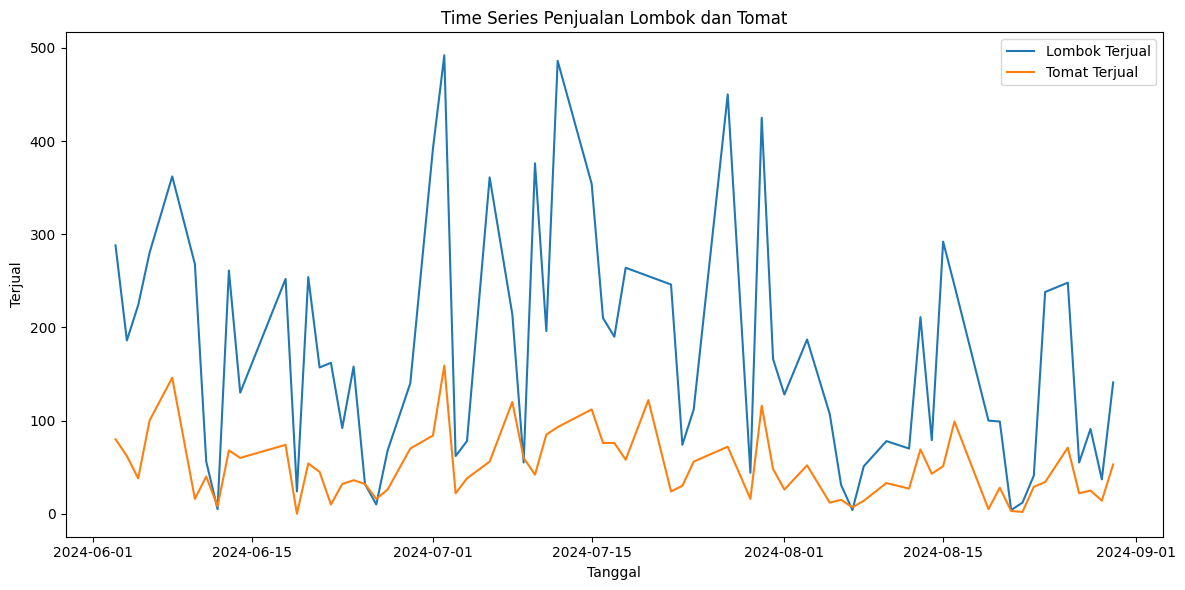

In [12]:
combined_indexed_df = combined_df.set_index('tanggal')

plt.figure(figsize=(12, 6))
plt.plot(combined_indexed_df.index, combined_indexed_df['lombok_terjual'], label='Lombok Terjual')
plt.plot(combined_indexed_df.index, combined_indexed_df['tomat_terjual'], label='Tomat Terjual')

plt.xlabel('Tanggal')
plt.ylabel('Terjual')
plt.title('Time Series Penjualan Lombok dan Tomat')
plt.legend()

plt.tight_layout()


plt.show()

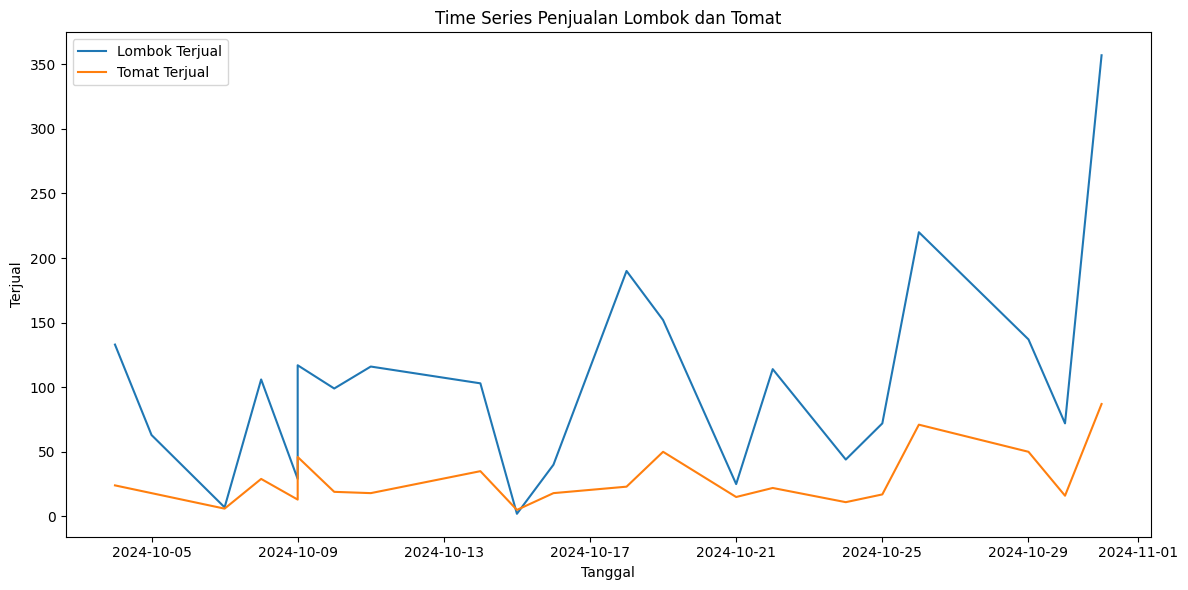

In [13]:
df4_indexed = df4.set_index('tanggal')

plt.figure(figsize=(12, 6))
plt.plot(df4_indexed.index, df4_indexed['lombok_terjual'], label='Lombok Terjual')
plt.plot(df4_indexed.index, df4_indexed['tomat_terjual'], label='Tomat Terjual')

plt.xlabel('Tanggal')
plt.ylabel('Terjual')
plt.title('Time Series Penjualan Lombok dan Tomat')
plt.legend()

plt.tight_layout()


plt.show()

In [ ]:
combined_df['tanggal'] = pd.to_datetime(combined_df['tanggal'])

# Convert 'tanggal' to numerical format (e.g., timestamp)
combined_df['tanggal_num'] = combined_df['tanggal'].map(pd.Timestamp.timestamp)
df4['tanggal_num'] = df4['tanggal'].map(pd.Timestamp.timestamp)


# Separate features and target variable
X_train = combined_df[['tanggal_num']]
y_train = combined_df[['lombok_terjual', 'tomat_terjual']]

X_test = df4[['tanggal_num']]
y_test = df4[['lombok_terjual', 'tomat_terjual']]

# Model Algoritma

## Regresi Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the linear regression model
lingres = LinearRegression()
lingres.fit(X_train, y_train)

# Predict using the testing data
pred = lingres.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred)

print(mse)

4389.067265224718


In [29]:
results_df = df4[['tanggal']].copy()
results_df['lombok_terjual_actual'] = y_test['lombok_terjual'].values
results_df['tomat_terjual_actual'] = y_test['tomat_terjual'].values
results_df['lombok_terjual_pred'] = pred[:, 0]
results_df['tomat_terjual_pred'] = pred[:, 1]

# Display the results
print(results_df)

      tanggal  lombok_terjual_actual  tomat_terjual_actual  \
0  2024-10-31                    357                    87   
1  2024-10-30                     72                    16   
2  2024-10-29                    137                    50   
3  2024-10-26                    220                    71   
4  2024-10-25                     72                    17   
5  2024-10-24                     44                    11   
6  2024-10-22                    114                    22   
7  2024-10-21                     25                    15   
8  2024-10-19                    152                    50   
9  2024-10-18                    190                    23   
10 2024-10-16                     40                    18   
11 2024-10-15                      2                     5   
12 2024-10-14                    103                    35   
13 2024-10-11                    116                    18   
14 2024-10-10                     99                    19   
15 2024-

## Regresi Polinomial

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict using the testing data
pred = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')

# Create a DataFrame to show the predictions and actual values
results_df = df4[['tanggal']].copy()
results_df['lombok_terjual_actual'] = y_test['lombok_terjual'].values
results_df['tomat_terjual_actual'] = y_test['tomat_terjual'].values
results_df['lombok_terjual_pred'] = pred[:, 0]
results_df['tomat_terjual_pred'] = pred[:, 1]

# Display the results
print(results_df)

Mean Squared Error: 57868.28069038776
      tanggal  lombok_terjual_actual  tomat_terjual_actual  \
0  2024-10-31                    357                    87   
1  2024-10-30                     72                    16   
2  2024-10-29                    137                    50   
3  2024-10-26                    220                    71   
4  2024-10-25                     72                    17   
5  2024-10-24                     44                    11   
6  2024-10-22                    114                    22   
7  2024-10-21                     25                    15   
8  2024-10-19                    152                    50   
9  2024-10-18                    190                    23   
10 2024-10-16                     40                    18   
11 2024-10-15                      2                     5   
12 2024-10-14                    103                    35   
13 2024-10-11                    116                    18   
14 2024-10-10                   

## ARIMA

In [40]:
from statsmodels.tsa.arima.model import ARIMA

model_lombok = ARIMA(combined_indexed_df['lombok_terjual'], order=(5, 1, 0))  # Adjust the order (p, d, q) as needed
model_lombok_fit = model_lombok.fit()

# Forecast using the ARIMA model
forecast_lombok = model_lombok_fit.forecast(steps=len(df4))

# Fit ARIMA model for 'tomat_terjual'
model_tomat = ARIMA(combined_indexed_df['tomat_terjual'], order=(5, 1, 0))  # Adjust the order (p, d, q) as needed
model_tomat_fit = model_tomat.fit()

# Forecast using the ARIMA model
forecast_tomat = model_tomat_fit.forecast(steps=len(df4))

# Evaluate the model
mse_lombok = mean_squared_error(df4_indexed['lombok_terjual'], forecast_lombok)
mse_tomat = mean_squared_error(df4_indexed['tomat_terjual'], forecast_tomat)

print(f'Mean Squared Error for Lombok Terjual: {mse_lombok}')
print(f'Mean Squared Error for Tomat Terjual: {mse_tomat}')

# Create a DataFrame to show the predictions and actual values
results_df = df4_indexed.copy()
results_df['lombok_terjual_pred'] = forecast_lombok.values
results_df['tomat_terjual_pred'] = forecast_tomat.values

# Display the results
print(results_df)

Mean Squared Error for Lombok Terjual: 6016.2242482642105
Mean Squared Error for Tomat Terjual: 482.9237200836256
            lombok_terjual  tomat_terjual    bulan  lombok_terjual_pred  \
tanggal                                                                   
2024-10-31             357             87  2024-10           139.923176   
2024-10-30              72             16  2024-10           125.207083   
2024-10-29             137             50  2024-10           103.885985   
2024-10-26             220             71  2024-10           102.801361   
2024-10-25              72             17  2024-10           106.001702   
2024-10-24              44             11  2024-10           118.130702   
2024-10-22             114             22  2024-10           117.140145   
2024-10-21              25             15  2024-10           113.507967   
2024-10-19             152             50  2024-10           110.653267   
2024-10-18             190             23  2024-10           

c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_lombok = SARIMAX(combined_indexed_df['lombok_terjual'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust the order (p, d, q) and seasonal_order (P, D, Q, s) as needed
model_lombok_fit = model_lombok.fit(disp=False)

# Forecast using the SARIMA model
forecast_lombok = model_lombok_fit.get_forecast(steps=len(df4))
forecast_lombok_values = forecast_lombok.predicted_mean

# Fit SARIMA model for 'tomat_terjual'
model_tomat = SARIMAX(combined_indexed_df['tomat_terjual'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust the order (p, d, q) and seasonal_order (P, D, Q, s) as needed
model_tomat_fit = model_tomat.fit(disp=False)

# Forecast using the SARIMA model
forecast_tomat = model_tomat_fit.get_forecast(steps=len(df4_indexed))
forecast_tomat_values = forecast_tomat.predicted_mean

# Evaluate the model
mse_lombok = mean_squared_error(df4_indexed['lombok_terjual'], forecast_lombok_values)
mse_tomat = mean_squared_error(df4_indexed['tomat_terjual'], forecast_tomat_values)

print(f'Mean Squared Error for Lombok Terjual: {mse_lombok}')
print(f'Mean Squared Error for Tomat Terjual: {mse_tomat}')

# Create a DataFrame to show the predictions and actual values
results_df = df4_indexed.copy()
results_df['lombok_terjual_pred'] = forecast_lombok_values.values
results_df['tomat_terjual_pred'] = forecast_tomat_values.values

# Display the results
print(results_df)

c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next

Mean Squared Error for Lombok Terjual: 8917.856046598134
Mean Squared Error for Tomat Terjual: 482.19224054318227
            lombok_terjual  tomat_terjual    bulan  lombok_terjual_pred  \
tanggal                                                                   
2024-10-31             357             87  2024-10           114.304392   
2024-10-30              72             16  2024-10            46.572487   
2024-10-29             137             50  2024-10            92.882859   
2024-10-26             220             71  2024-10            66.873136   
2024-10-25              72             17  2024-10           108.970154   
2024-10-24              44             11  2024-10            -4.989772   
2024-10-22             114             22  2024-10           112.903341   
2024-10-21              25             15  2024-10           105.283693   
2024-10-19             152             50  2024-10            45.318595   
2024-10-18             190             23  2024-10           

c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Result and Discussion

# Kesimpulan

# Referensi